##### Grading Feedback Cell

# IST 718: Big Data Analytics

- Professor: Willard Williamson <wewillia@syr.edu>
- Faculty Assistant: Vidushi Mishra <vmishr01@syr.edu>
- Faculty Assistant: Pranav Kottoli Radhakrishna <pkottoli@syr.edu>
## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers from your classmates.  Short code snippets are allowed from the internet.  Code from the class text books or class provided code can be copied in its entirety.__
- There could be tests in some cells (i.e., `assert` and `np.testing.` statements). These tests (if present) are used to grade your answers. **However, the professor and FAs could use __additional__ test for your answer. Think about cases where your code should run even if it passess all the tests you see.**
- Before submitting your work, remember to check for run time errors with the following procedure:
`Kernel`$\rightarrow$`Restart and Run All`.  All runtime errors will result in a minimum penalty of half off.
- Data Bricks is the official class runtime environment so you should test your code on Data Bricks before submission.  If there is a runtime problem in the grading environment, we will try your code on Data Bricks before making a final grading decision.
- <span class="girk">All plots shall include a title, and axis labels</span>.  Unless stated otherwise, plots can be made using your favorite Python plotting package.
- Grading feedback cells are there for graders to provide feedback to students.  Don't change or remove grading feedback cells.
- <span class="girk">Don't add or remove files from your git repo</span>.
- <span class="girk">Do not change file names</span> in your repo.  This also means don't change the title of the ipython notebook.
- You are free to add additional code cells around the cells marked `your code here`.
- Students may use toPandas() to print the head of data frames.
- We reserve the right to take points off for operations that are extremely inefficient.  This is a big data class and extremely inefficient operations make a big difference when scaling up to large data sets.
- Students are responsible for reading the usage comments and understanding how to properly use the utility functions (like get_training_filename()) provided in the assignments.  Runtime errors which result from incorrect usage of utility functions shall result in a  point reduction.  
- <span class="girk">import * is not allowed</span> because it is considered a very bad coding practice and in some cases can result in a significant delay (which slows down the grading process) in loading imports.  For example, the statement `from sympy import *` is not allowed.  You must import the specific packages that you need.
- If you perform databricks specific operations, <span class="girk">you MUST protect those operations in an if statement by calling the is_databricks() function</span> provided in all homework assignments.  For example, if you use dbutils (databricks utilities), only run dbutils commands if is_databricks() returns true.  Runtime errors created in the grading environment by not protecting databricks specific commands in an if statement will result in a runtime error points deduction. 
- The graders reserve the right to deduct points for subjective things we see with your code.  For example, if we ask you to create a pandas data frame to display values from an investigation and you hard code the values, we will take points off for that.  This is only one of many different things we could find in reviewing your code.  In general, write your code like you are submitting it for a code peer review in industry.  
- Level of effort is part of our subjective grading.  Oftentimes there is a large disparity between the level of effort between students who are trying learn, and students who are trying to do the minimum possible to check off an assignment requirement.  For example, in cases where we ask for a more open ended investigation, some students put in significant effort and some students do the minimum possible to meet requirements.  In these cases, we may take points off for students who did not put in much effort as compared to students who did put in a lot of effort.  We feel that the students who did a better job deserve a better grade.  We reserve the right to invoke level of effort grading at any time.
- __Only use spark, spark machine learning, spark data frames, RDD's, and map reduce to solve all problems unless instructed otherwise.  Heavy weight operations that convert data to pandas or spark (like collect()) will result in a point reduction.__

In [3]:
# Do not delete or change this cell

# grading import statements
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
import os

# Define a function to determine if we are running on data bricks
# Return true if running in the data bricks environment, false otherwise
def is_databricks():
    # get the databricks runtime version
    db_env = os.getenv("DATABRICKS_RUNTIME_VERSION")
    
    # if running on data bricks
    if db_env != None:
        return True
    else:
        return False

# Define a function to read the data file.  The full path data file name is constructed
# by checking runtime environment variables to determine if the runtime environment is 
# databricks, or a student's personal computer.  The full path file name is then
# constructed based on the runtime env.
# 
# Params
#   data_file_name: The base name of the data file to load
# 
# Returns the full path file name based on the runtime env
#
# Correct Usage Example (pass ONLY the full file name):
#   file_name_to_load = get_training_filename("sms_spam.csv") # correct - pass ONLY the full file name  
#   
# Incorrect Usage Example
#   file_name_to_load = get_training_filename("/sms_spam.csv") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("sms_spam.csv/") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("c:/users/will/data/sms_spam.csv") incorrect -pass ONLY the full file name
def get_training_filename(data_file_name):    
    # if running on data bricks
    if is_databricks():
        # build the full path file name assuming data brick env
        full_path_name = "/FileStore/tables/%s" % data_file_name
    # else the data is assumed to be in the same dir as this notebook
    else:
        # Assume the student is running on their own computer and load the data
        # file from the same dir as this notebook
        full_path_name = data_file_name
    
    # return the full path file name to the caller
    return full_path_name

# Question 1 (10 pts)
In the game of [roullete](https://en.wikipedia.org/wiki/Roulette) you can bet on several things including if the ball will land on black or red. In a black or red bet, if you win, you double your earnings. How does the casino make money? If you look at the possibilities you realize that the chance of red or black are both slightly less than 1/2. There are two green spots, so the chance of landing on black (or red) is actually 18/38, or 9/19.<br>
Create a utility function which can be used in a monte carlo simulation named get_outcome. The get_outcome function takes as an argument the number of times you play (or spin) the roulette wheel and returns the player's earnings for the number of spins specified.  Assume that the player bets exactly one dollar on black for each spin of the wheel.

In [5]:
# your code here
# import random package
import random

def get_outcome(n):
    # define the color that each number belongs to, both red and black has 18 spots while green has two spots
    red   = {1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36}
    black = {2, 4, 6, 8, 10, 11, 13, 15, 17, 20, 22, 24, 26, 28, 29, 31, 33, 35}
    green = {0, 37}
    
    # generate a random generator to monitor the rolling result
    def roll():
        return random.randint(0,37)
    
    earnings = 0
    run_time = 1
    
    while run_time <= n:
        roll_result = roll()
        if roll_result in black:
            earnings += 1
            run_time += 1
        else:
            earnings -= 1
            run_time += 1
    
    return earnings

In [6]:
# Grading cell - do not change or delete
num_plays = 10000
get_outcome(num_plays) / num_plays

Out[7]: -0.0508

##### Grading Feedback Cell

# Question 2 (10 pts)
Using the get_outcome function defined above, use a monte carlo simulation to study the distribution of total earnings.  Run 4 simulations for number of roulette plays = 10, 25, 100, and 1000 where each of the 4 simulations is executed 500 times.  Collect the results into a 2 dimensional numpy array named roulette_sim_array.  The data frame shall have 4 labeled columns where each column contains data from each of the 4 simulations. Create histograms that show the distributions of total earnings for the 4 simulations.  Based on the histogram plots, describe what happens to toal earnings as the number of plays increases.

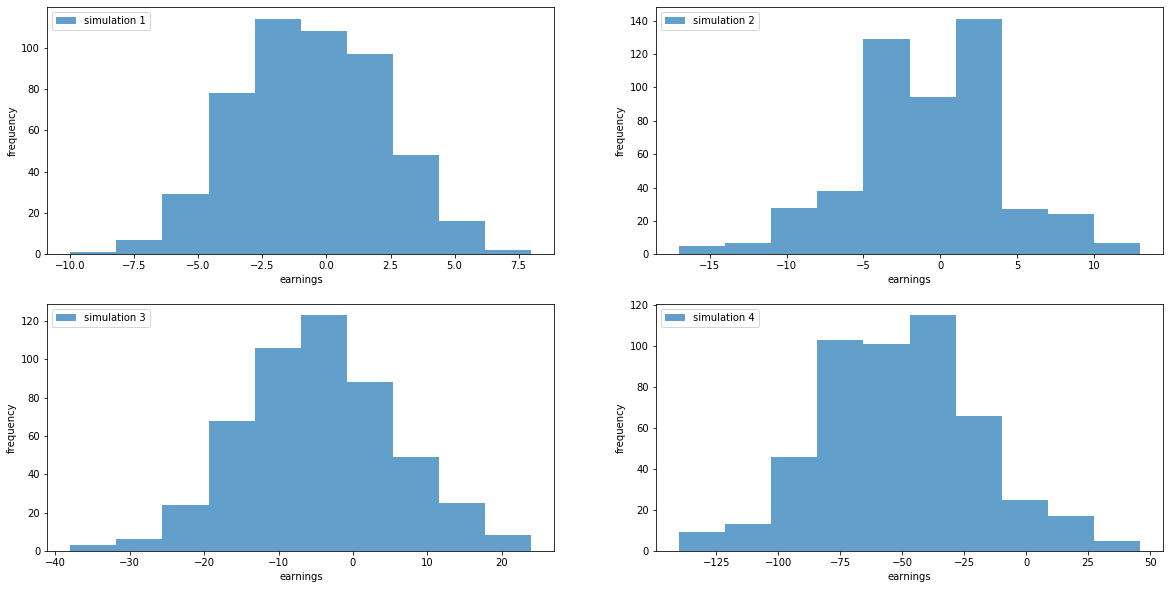

In [9]:
# your code here
# import numpy and matplotlib package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# initial a 4*500 numpy array
roulette_sim_array = np.zeros((500,4), dtype='int')

# execute the get_outcome 500 times for each simulation and store the results into the array respectively
numbers = {'10':0, '25':1, '100':2, '1000':3}

for i in (10,25,100,1000):
    for x in range(500):
        roulette_sim_array[x][numbers.get(str(i))] = get_outcome(i)

# exame the result
print(roulette_sim_array)

# convert the numpy array to pandas dataframe so that making plots becomes more convinient
df = pd.DataFrame(data=roulette_sim_array, columns=["simulation 1", "simulation 2", "simulation 3", "simulation 4"])

# define the plot attributes
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
counter = 0
for i in range(2):
    for j in range(2):
        ax = axes[i][j]
        ax.hist(df[df.columns[counter]], alpha = 0.7, label='{}'.format(df.columns[counter]))
        ax.set_xlabel('earnings')
        ax.set_ylabel('frequency')
        leg = ax.legend(loc='upper left')
        counter += 1
plt.show()

##### Grading Feedback Cell

Your explanation here:<br> As the number of playing times goes up, according to the central limit theorem, when independent random variables are added, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed. Hence it is normally distributed if the sample is big enough. Besides, with a increase of playing time, the distribution is shifting to left, indicating that people will lost more money if they increase the playing times. <br>
Besides, all those four simulations share one similar pattern which is that the bar with the highest frequency always located in the middle of x-axis. Statistically speaking, since the chance of winning the game is nearly 0.47, people have approximatly 50 percent of chance to win a game. If a person plays the game of roullete 100 times, it is highyly possible for him to win 50 times and to lose 50 times. It is also possible for him to lose or win 100 times continuously, however, this possibility would be extremely low.

##### Grading Feedback Cell

# Question 3 (10 pts)
Using the central limit theorem, create a pandas dataframe named roulette_df containing the sampling distribution of the means from the sample data in the numpy array above.  The pandas dataframe should have 4 columns labeled with the simulation names. Using data in the roulette_df, plot histograms for each of the sampling distributions - you should have 4 histograms in total.<br>  Assuming you don't know the underlying distribution of the population from which the samples were drawn, some of the histograms are gauranteed to be Gaussian in shape, some are not gauranteed, and some are in a transition region. For each of the 4 simulations, describe if you think the shape is gauranteed to be gaussian, not gauranteed to be Gaussian, or in a transition area between a gaurantee and no gaurantee.

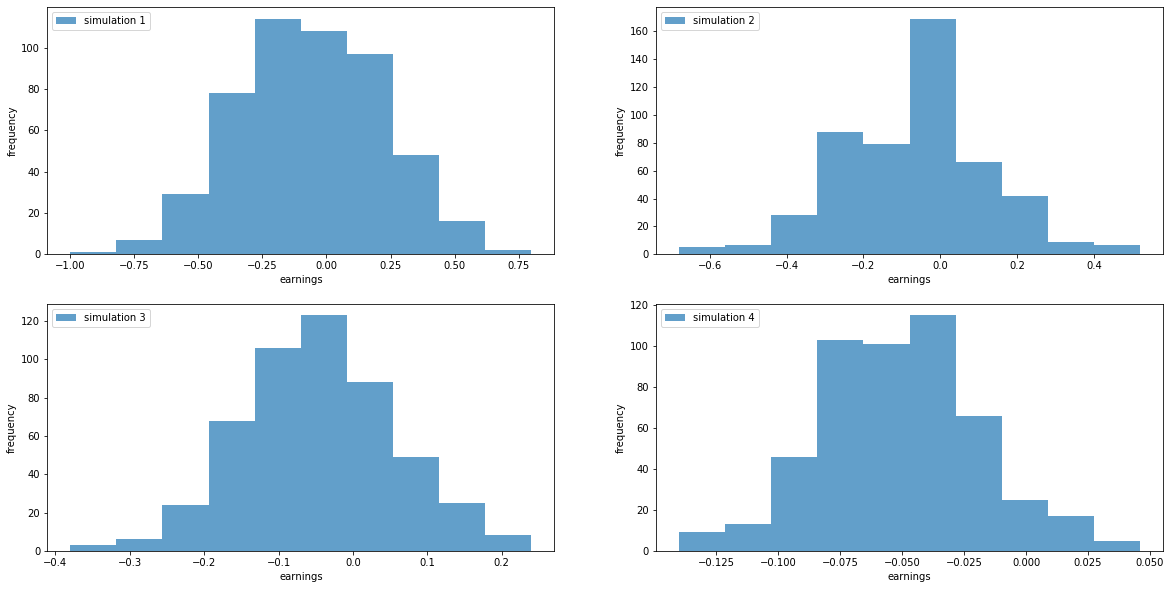

In [14]:
# your code here
roulette_df = pd.DataFrame(data=roulette_sim_array, columns=["simulation 1", "simulation 2", "simulation 3", "simulation 4"])
# let each column divide by responding value
for i in (10, 25, 100, 1000):
    roulette_df.iloc[:,numbers.get(str(i))] = roulette_df.iloc[:,numbers.get(str(i))].div(i)

# define the plot attributes
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
counter = 0
for i in range(2):
    for j in range(2):
        ax = axes[i][j]
        ax.hist(roulette_df[roulette_df.columns[counter]], alpha = 0.7, label='{}'.format(roulette_df.columns[counter]))
        ax.set_xlabel('earnings')
        ax.set_ylabel('frequency')
        leg = ax.legend(loc='upper left')
        counter += 1
plt.show()

In [15]:
# Grading cell - do not modify
roulette_df.head()

,simulation 1,simulation 2,simulation 3,simulation 4
0,-0.2,0.28,-0.24,-0.066
1,-0.2,0.12,-0.06,-0.096
2,0.4,-0.04,-0.14,-0.104
3,0.0,0.04,-0.28,-0.026
4,-0.6,0.12,-0.16,-0.028


##### Grading Feedback Cell

Your explanation here:<br> The shape of those four histograms demonstrates a thing that the shape will become normally distributed if the sample is large enough. Therefore, I think those graphs are in a transition area between a gaurantee of being gaussian and no gaurantee of being guassian. This is the central limit theorem.

##### Grading Feedback Cell

# Question 4 (20 pts)
Create a new monte carlo simulation that calculates the probability that the casino loses money based on the number of times that a player plays roulette.  Create a function p_casino_loss that takes as an argument the number of times that the player plays roulette, and returns the probability that the casino loses money.  Using data collected from p_casino_loss, produce a line plot that shows the probability that the casino loses money vs. the number of games played for number of games between 25 and 1000.  Describe what the results of the simulation show.

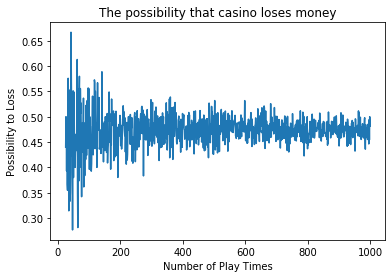

In [20]:
# your code here
def p_casino_loss(num_plays):
    # define the colors that each number belongs to
    red   = {1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36}
    black = {2, 4, 6, 8, 10, 11, 13, 15, 17, 20, 22, 24, 26, 28, 29, 31, 33, 35}
    green = {0, 37}
    
    # build a simulator to randomly pick a number
    def rolling():
        return random.randint(0,37)
    
    loss_time = 0
    run_time = 1
    
    while run_time <= num_plays:
        roll_result = rolling()
        
        if roll_result in black:
            loss_time += 1
            run_time += 1
        else:
            run_time += 1
    
    return (loss_time/num_plays)

# create a list to store the resulst of loss possibility
casino_loss = []
for i in range(25, 1000):
    casino_loss.append(p_casino_loss(i))

# draw a line chart according to the results of loss possibility
plt.plot(range(25,1000), casino_loss)
plt.title('The possibility that casino loses money')
plt.xlabel('Number of Play Times')
plt.ylabel('Possibility to Loss')
plt.show()

Your explanation here:<br> The line become more stable when the number of paly times goes up. Specifically, the line fluactuates significantly between 25 to 200. After 200, the line becomes more stable while the value tend to centralize in 0.473.

##### Grading Feedback Cell

# Question 5 (10 pts)
Compute the following matrix dot product manually by creating 2 dimensinal nympy arrays for each matrix, computing the matrix multiply using for loops, and loading a new 2 dimensional numpy array with the answer.  Print the resulting numpy array.

$$
\quad
\begin{bmatrix} 
3 & 7 \\
6 & 9 \\
4 & 2 \\
\end{bmatrix}
\quad
*
\quad
\begin{bmatrix} 
2 & 5 & 7\\
2 & 5 & 1
\end{bmatrix}
\quad
$$

In [24]:
# your code here
first_array = np.array([[3,7], [6,9], [4,2]])
second_array = np.array([[2,5,7], [2,5,1]])

# since it is a 3*2 matrix multiple with 2*3 matrix, the result should be a 3*3 matrix.
result_array = np.zeros((3,3), dtype='int')

# for first_array, it has 3 rows and 2 columns
for i in range(len(first_array)):
    # if we specify the row number, then we can find that second_array has 3 items in the sub-list.
    for j in range(len(second_array[0])):
        # for second_array, it has 2 rows and 3 columns
        for k in range(len(second_array)):
            result_array[i][j] += first_array[i][k] * second_array[k][j]

result_array

Out[12]: array([[20, 50, 28],
 [30, 75, 51],
 [12, 30, 30]])

##### Grading Feedback Cell

# Question 6 (10 pts)
Read each of the csv files in your assignment repo into pandas dataframes named population_df, morttality_df, life_exp_df, and fertility_df.  Rename the column with the country names as "Country" in each of the dataframes.

In [27]:
# your code here
pop_data_url = 'https://raw.githubusercontent.com/wewilli1/ist718_data/master/un_indicator_data/indicator_gapminder_population.csv'
mort_data_url = 'https://raw.githubusercontent.com/wewilli1/ist718_data/master/un_indicator_data/indicator_gapminder_under5mortality.csv'
life_exp_data_url = 'https://raw.githubusercontent.com/wewilli1/ist718_data/master/un_indicator_data/indicator_life_expectancy_at_birth.csv'
fert_data_url = 'https://raw.githubusercontent.com/wewilli1/ist718_data/master/un_indicator_data/indicator_undata_total_fertility.csv'

population_df = pd.read_csv(pop_data_url)
morttality_df = pd.read_csv(mort_data_url)
life_exp_df = pd.read_csv(life_exp_data_url)
fertility_df = pd.read_csv(fert_data_url)

# change the column name of each dataframe by using the specifix column index
population_df.rename(columns = {list(population_df)[0]:'Country'}, inplace=True)
morttality_df.rename(columns = {list(morttality_df)[0]:'Country'}, inplace=True)
life_exp_df.rename(columns = {list(life_exp_df)[0]:'Country'}, inplace=True)
fertility_df.rename(columns = {list(fertility_df)[0]:'Country'}, inplace=True)

In [28]:
# grading cell - do not modify
display(population_df)
display(morttality_df)
display(life_exp_df)
display(fertility_df)

Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Abkhazia,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.03,7.05,7.08,7.11,7.14,7.16,7.19,7.22,7.24,7.27,7.3,7.32,7.35,7.38,7.4,7.43,7.46,7.48,7.51,7.54,7.56,7.59,7.62,7.64,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.68,7.68,7.68,7.68,7.68,7.68,7.69,7.7,7.73,7.76,7.8,7.83,7.86,7.87,7.85,7.81,7.73,7.62,7.48,7.32,7.14,6.93,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47
Akrotiri and Dhekelia,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,nul

##### Grading Feedback Cell

# Question 7 (10 pts)
The data frames from the question above are organized such that rows are countries and columns are years.  Reorganize each data frame such that each row contains 3 columns: country, year, and a data value.  This is known as the long or tidy format.  For example, the population data frame columns start out as country, year, year, year, ..., year.  After reorganizing, the population data frame columns will contain only 3 columns: country, year, and population.  Save the reorganized data into new data frames named tidy_population_df, tidy_morttality_df, tidy_life_exp_df, and tidy_fertility_df.  You are free to use any means necessary to perform this task but the pandas melt function may be useful.

In [31]:
# your code here
# using melt() function to convert the origianl dataframe to a long and tidey dataframe by setting Country column as ID
tidy_population_df = population_df.melt(id_vars = ['Country'])
tidy_morttality_df = morttality_df.melt(id_vars = ['Country'])
tidy_life_exp_df = life_exp_df.melt(id_vars = ['Country'])
tidy_fertility_df = fertility_df.melt(id_vars = ['Country'])

# changing the column names of those tidy versions dataframe
tidy_population_df.columns = ['Country', 'Year', 'Population']
tidy_morttality_df.columns = ['Country', 'Year', 'Mortality']
tidy_life_exp_df.columns = ['Country', 'Year', 'Life_Exp']
tidy_fertility_df.columns = ['Country', 'Year', 'Fertility']

In [32]:
# grading cell - do not modify
display(tidy_population_df)
print(tidy_population_df.size)
display(tidy_morttality_df)
print(tidy_morttality_df.size)
display(tidy_life_exp_df)
print(tidy_life_exp_df.size)
display(tidy_fertility_df)
print(tidy_fertility_df.size)

Country,Year,Fertility
Abkhazia,1800,null
Afghanistan,1800,7.0
Akrotiri and Dhekelia,1800,null
Albania,1800,4.6
Algeria,1800,6.99
American Samoa,1800,null
Andorra,1800,null
Angola,1800,6.93
Anguilla,1800,null
Antigua and Barbuda,1800,5.0


##### Grading Feedback Cell

# Question 8 (10 pts)
Join all 4 dataframes together such that the country, year, population, mortality, life expectancy, and fertility columns are collected together in the same dataframe.  The join operation should not throw away any data.  Name the new dataframe concat_df.  Next, delete all rows where the data values (values other than country and year) are all NaN values.  Only drop the row if ALL the data values are NaN.

In [35]:
# your code here
from functools import reduce
data_frames = [tidy_morttality_df, tidy_population_df, tidy_life_exp_df, tidy_fertility_df]
concat_df = reduce(lambda left,right: pd.merge(left, right, how = 'outer', on=['Country','Year']), data_frames)

# drop rows where data values other than country and year are NaN
concat_df = concat_df.dropna(subset=['Population', 'Mortality', 'Life_Exp', 'Fertility'], how="all")

In [36]:
# grading cell - do not modify
display(concat_df.head())
print(concat_df.shape)

Country,Year,Mortality,Population,Life_Exp,Fertility
Afghanistan,1800,468.58,3280000,28.211,7.0
Albania,1800,375.2,"410,445",35.4,4.6
Algeria,1800,460.21,"2,503,218",28.8224,6.99
American Samoa,1800,null,"8,170",null,null
Andorra,1800,null,2654,null,null


##### Grading Feedback Cell

# Question 9 (10 pts)
Using concat_df, report the child mortality rate and life expectancy in in 2015 for these 5 countries:
1. Sri Lanka
2. Poland
3. Malaysia
4. Pakistan
5. Thailand

In [39]:
# Your code here
array = ['Sri Lanka', 'Poland', 'Malaysia', 'Pakistan', 'Thailand']
concat_df.loc[(concat_df['Year'] == '2015') & concat_df['Country'].isin(array), ['Country', 'Year', 'Mortality', 'Life_Exp']]

,Country,Year,Mortality,Life_Exp
59475,Malaysia,2015,8.2,75.1
59511,Pakistan,2015,81.1,66.5
59519,Poland,2015,5.2,77.3
59553,Sri Lanka,2015,8.7,76.5
59564,Thailand,2015,12.3,75.1


##### Grading Feedback Cell